# Load Packages

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msn

# Import Data

In [53]:
df = pd.read_csv("dataset.csv")

# Simple view of data

In [54]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [55]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [56]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Is there missing data? 

<AxesSubplot:>

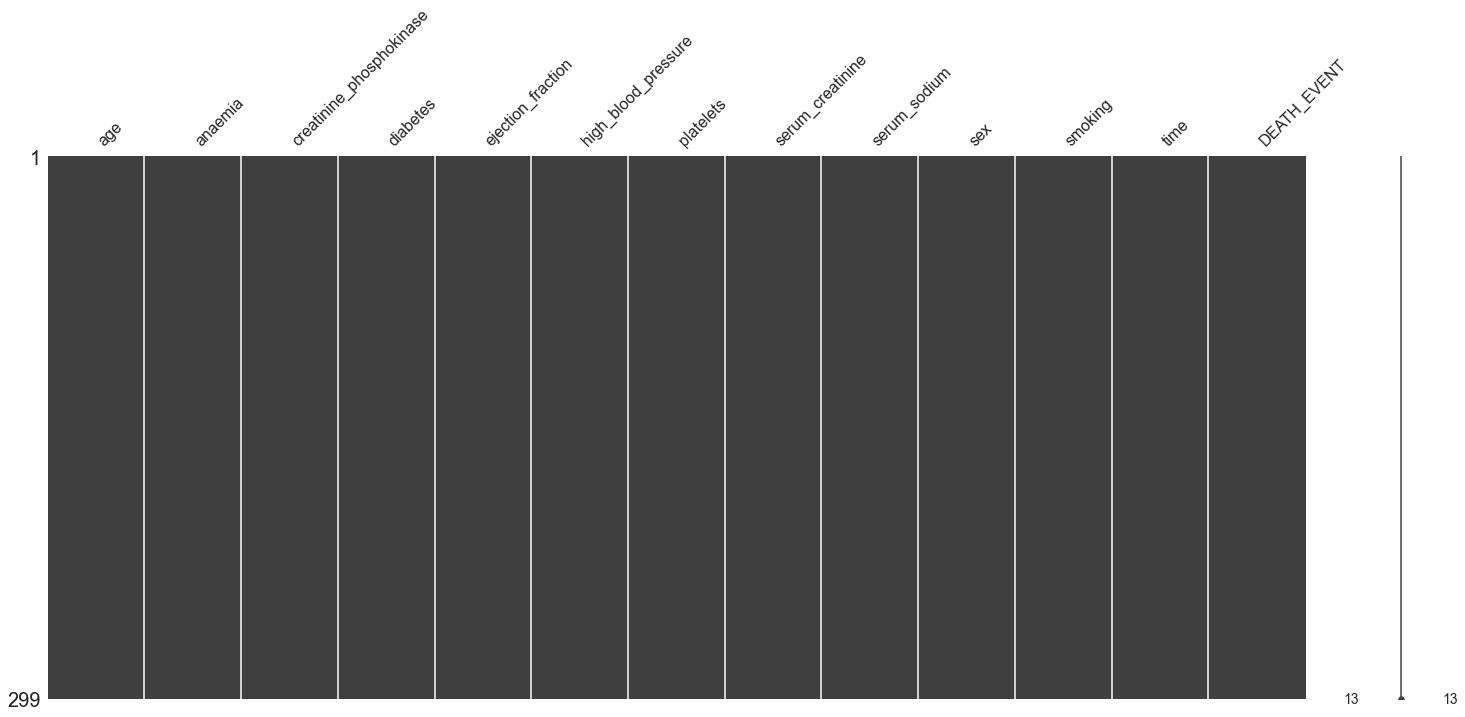

In [58]:
msn.matrix(df)

In [59]:
## There is no missing data!!

# Data Analysis

## Univariate Analysis (Continuous)

In [60]:
continuous = df.drop(["anaemia", "diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"], axis = 1)

In [61]:
continuous.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


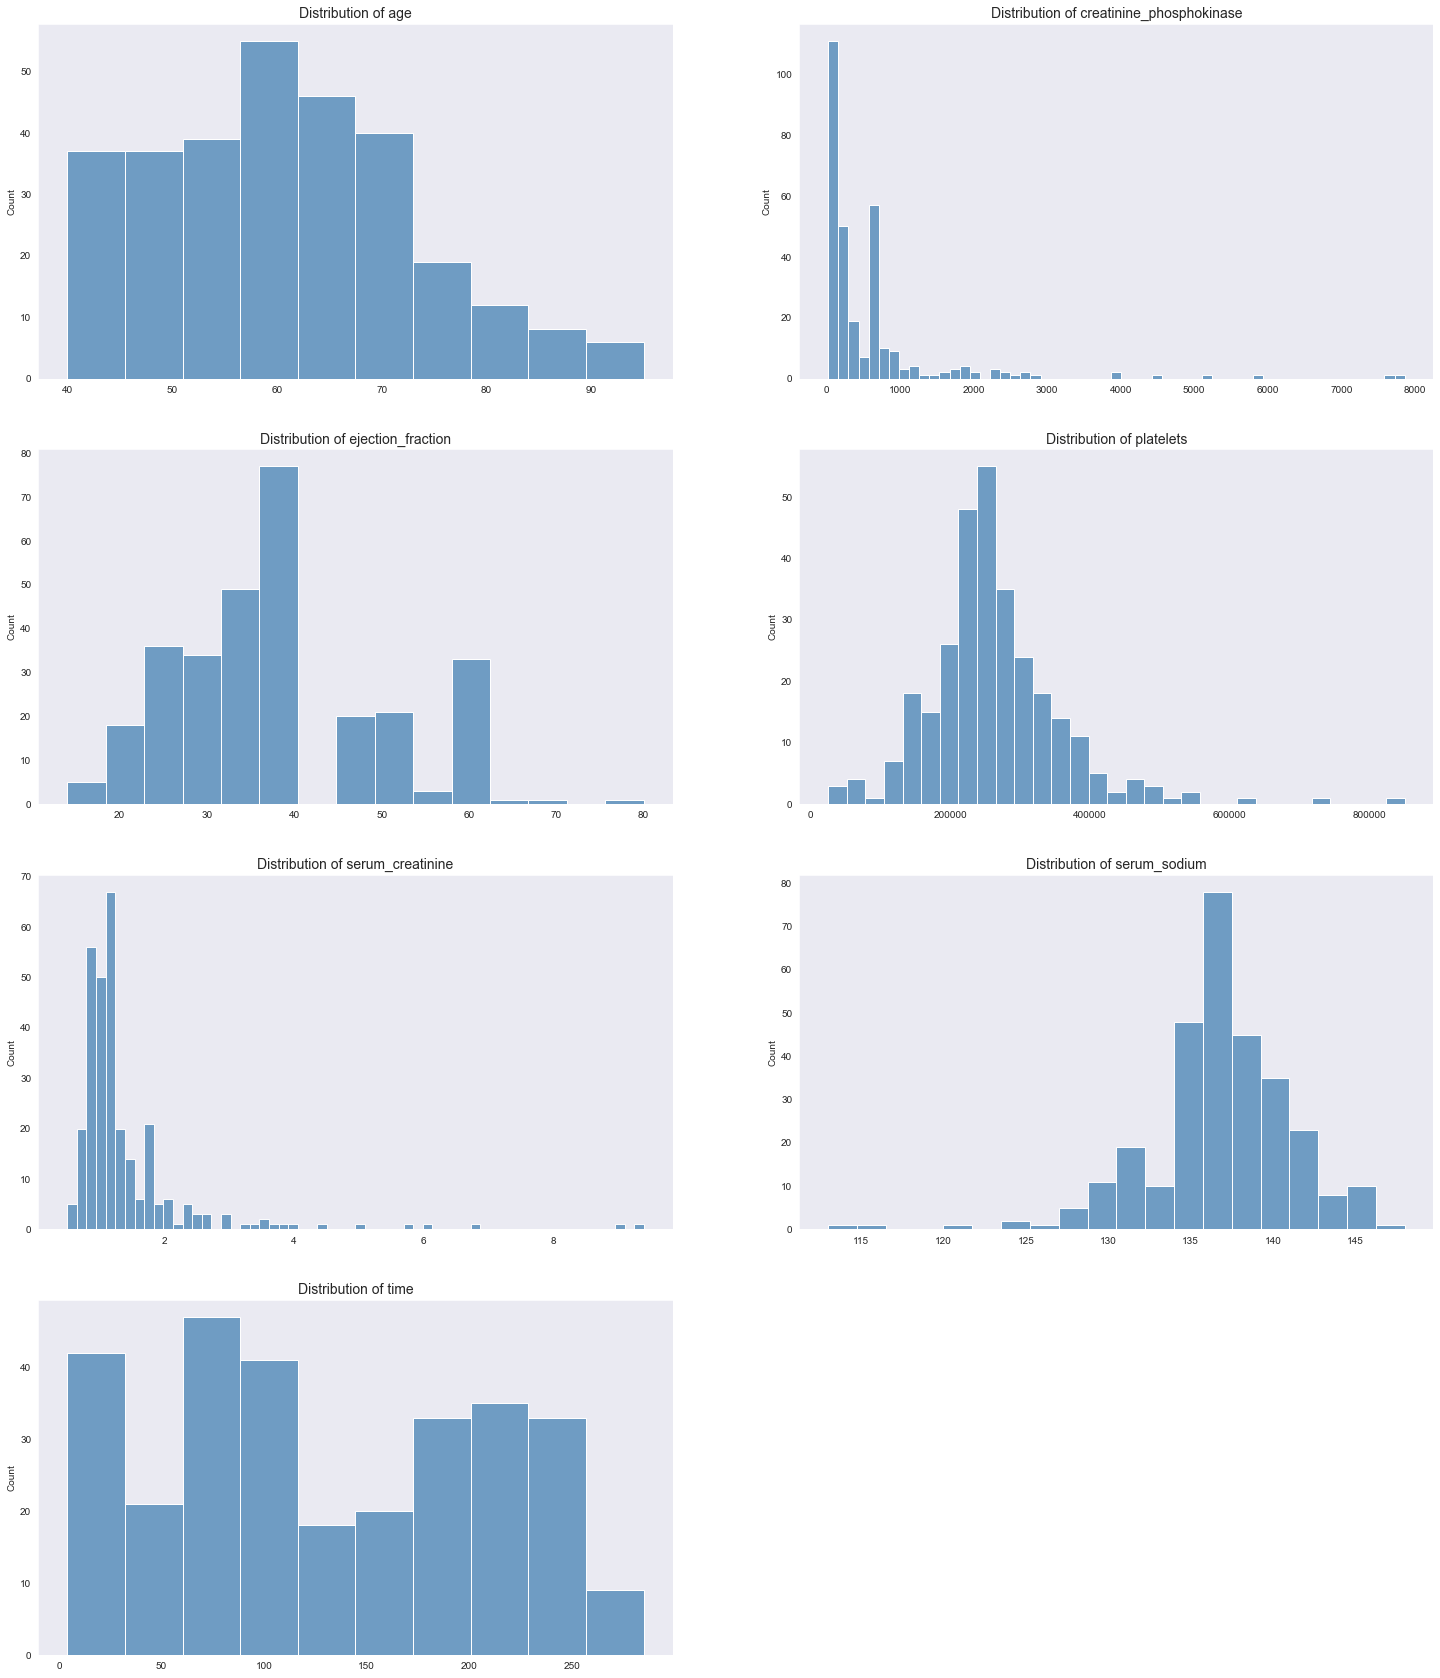

In [62]:
fig = plt.figure(figsize = (25,30))
sns.set_style("dark")
for i in range(len(continuous.columns)):
    plt.subplot(4,2,i+1)
    sns.histplot(continuous.iloc[:,i], color = "steelblue")
    plt.title("Distribution of {}".format(continuous.iloc[:,i].name), size = 14)
    plt.xlabel("")

## Univariate analysis (discrete)

In [63]:
discrete = df[["anaemia", "diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]]

In [64]:
discrete.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCard

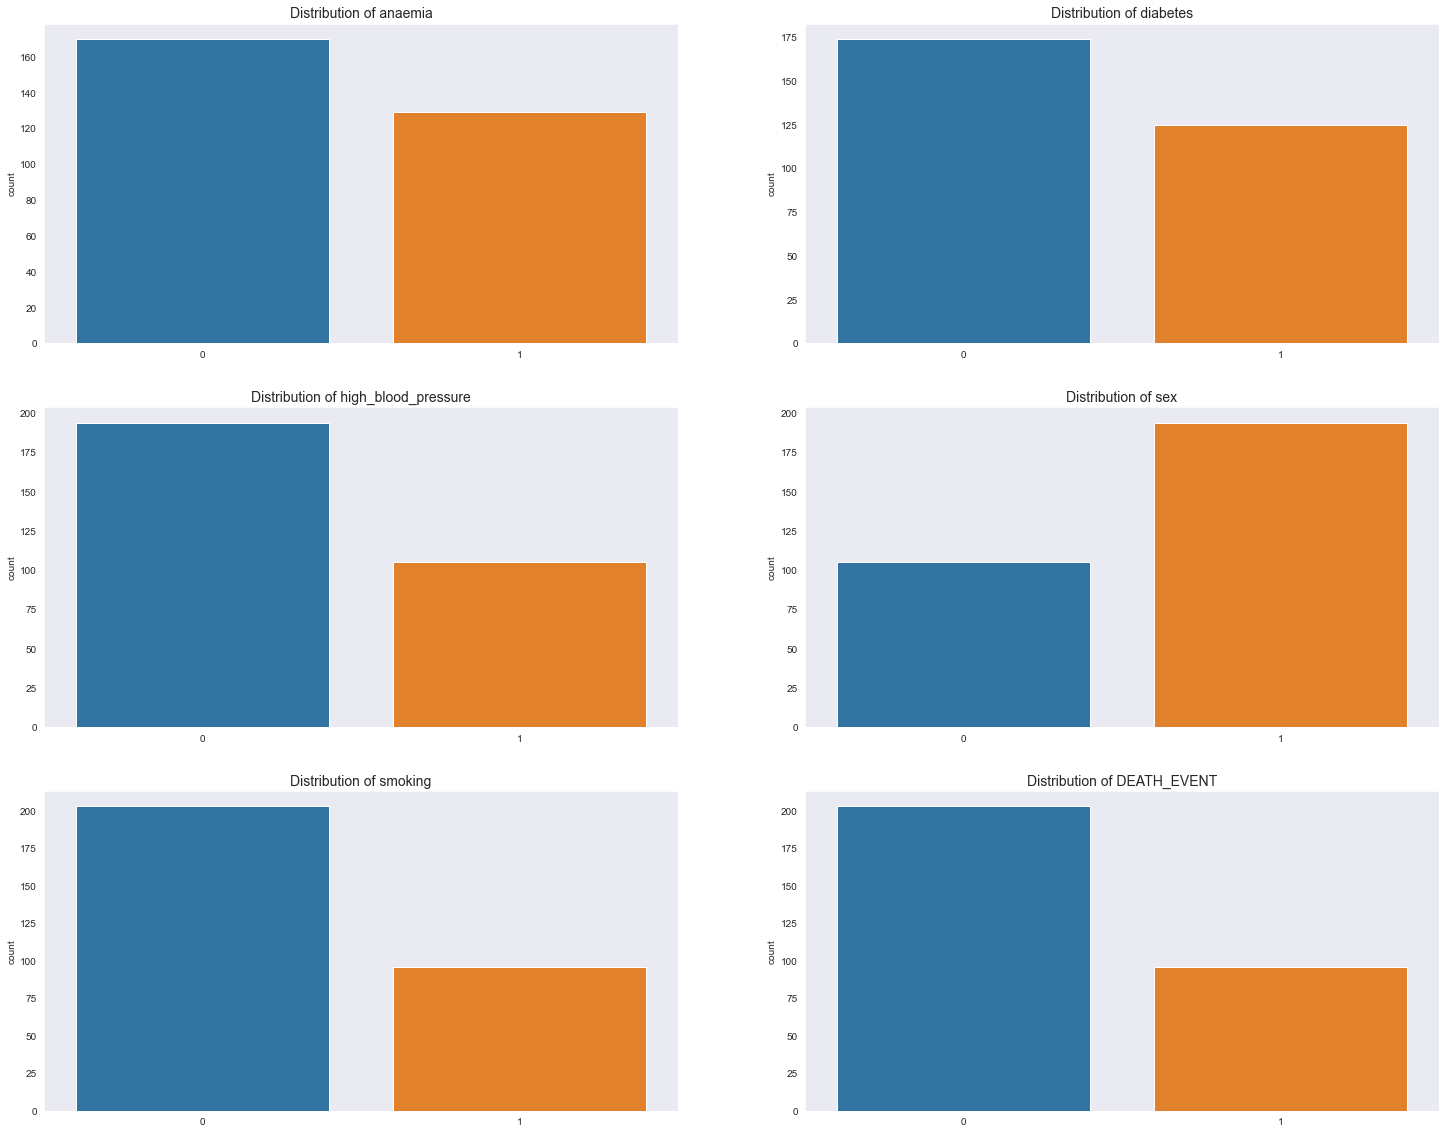

In [65]:
fig2 = plt.figure(figsize = (25,20))
sns.set_style("dark")
for i in range(len(discrete.columns)):
    plt.subplot(3,2,i+1)
    sns.countplot(discrete.iloc[:,i])
    plt.title("Distribution of {}".format(discrete.iloc[:,i].name), size = 14)
    plt.xlabel("")

## Bivariate analysis

### Sex and Death

In [66]:
sex = df.groupby("sex")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["sex"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([sex,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table


,sex,DEATH_EVENT,totals,pct
0,0,34,105,32.380952
1,1,62,194,31.958763


Text(0, 0.5, 'Percentage')

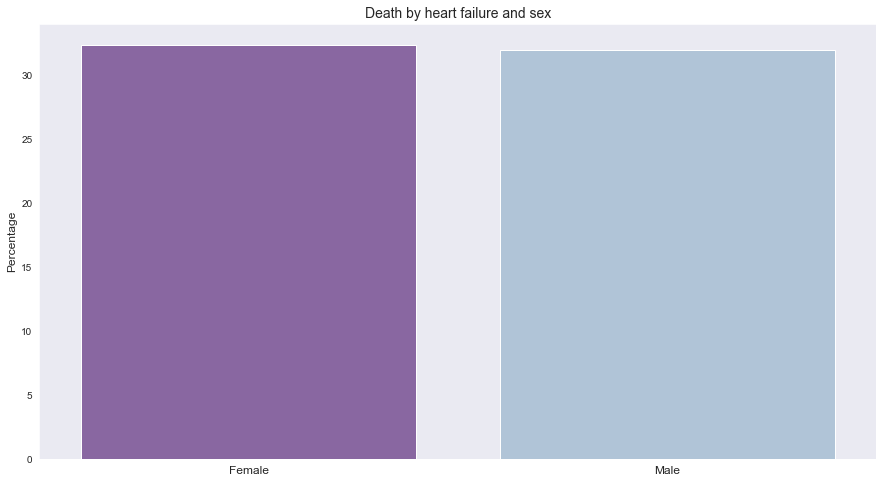

In [67]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "sex", y = "pct", data = pct_table, palette = "BuPu_r")
plt.title("Death by heart failure and sex", size = 14)
plt.xticks([0,1],["Female","Male"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

### Smoking and Death

In [68]:
smk = df.groupby("smoking")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["smoking"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([smk,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table

,smoking,DEATH_EVENT,totals,pct
0,0,66,203,32.512315
1,1,30,96,31.250000


Text(0, 0.5, 'Percentage')

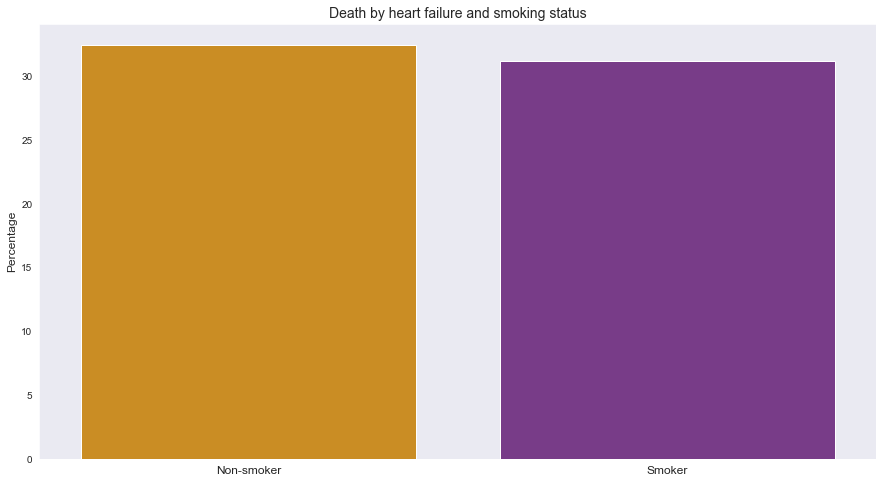

In [69]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "smoking", y = "pct", data = pct_table, palette = "CMRmap_r")
plt.title("Death by heart failure and smoking status", size = 14)
plt.xticks([0,1],["Non-smoker","Smoker"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

### Diabetes and Death

In [70]:
dbt = df.groupby("diabetes")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["diabetes"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([dbt,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table

,diabetes,DEATH_EVENT,totals,pct
0,0,56,174,32.183908
1,1,40,125,32.000000


Text(0, 0.5, 'Percentage')

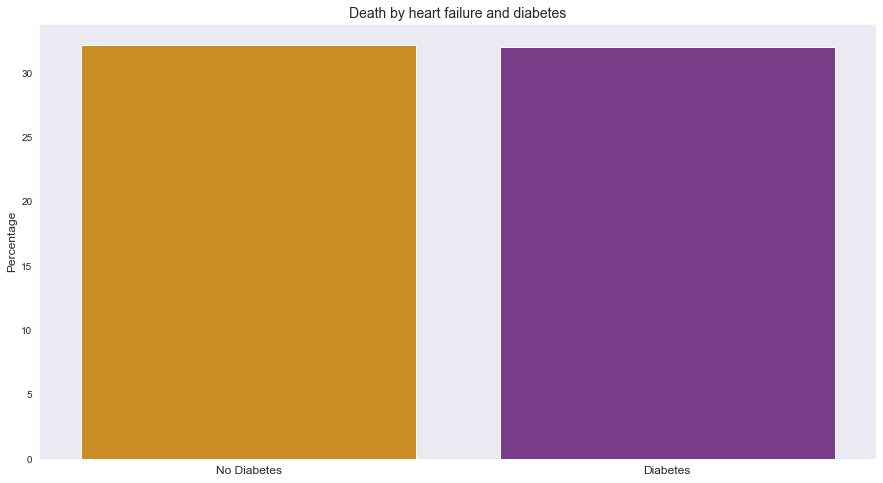

In [71]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "diabetes", y = "pct", data = pct_table, palette = "CMRmap_r")
plt.title("Death by heart failure and diabetes", size = 14)
plt.xticks([0,1],["No Diabetes","Diabetes"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

## Multivariate Analysis

### Sex, Age and Death

Text(0.5, 0, 'Sex')

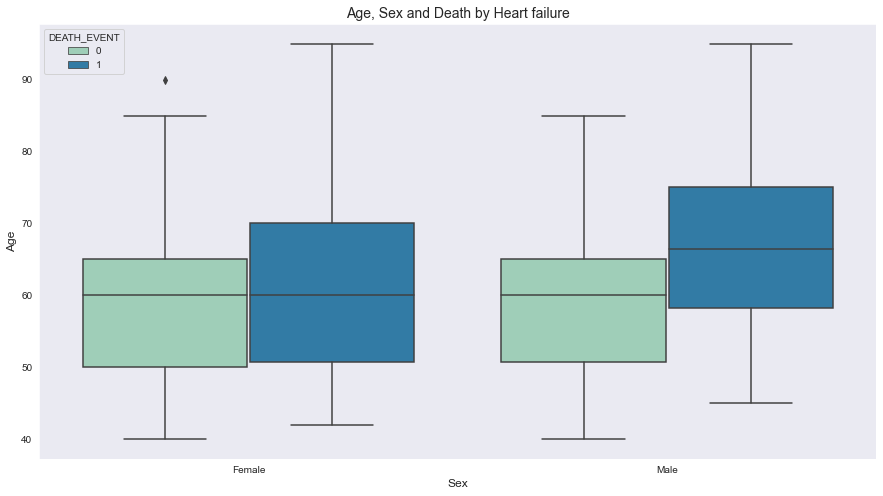

In [72]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "sex", y = "age", data = df, hue = "DEATH_EVENT", palette = "YlGnBu")
plt.title("Age, Sex and Death by Heart failure", size = 14)
plt.xticks([0,1],["Female","Male"])
plt.ylabel("Age", size = 12)
plt.xlabel("Sex", size = 12)